In [24]:
import pandas as pd
import numpy as np

from sqlalchemy import create_engine

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets
from sqlalchemy import create_engine
import warnings

In [25]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from heartdisease',con=engine)

# closing the connection to db
engine.dispose()

In [26]:
# Define the features and the outcome
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

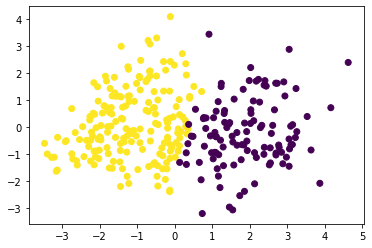

Comparing 303 k-means clusters against the data:
col_0    0    1
row_0          
0      101   13
1       38  151


In [27]:
X_std = StandardScaler().fit_transform(X)

X_pca = PCA(2).fit_transform(X_std)

y_pred = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing {} k-means clusters against the data:'.format(len(y)))
print(pd.crosstab(y_pred, y))

Looks like hte model is working, correctly identifying 252 out of 303